In [13]:
from bs4 import BeautifulSoup # For HTML parsing
import urllib2 # Website connections
import re # Regular expressions
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
from nltk.corpus import stopwords # Filter out stopwords, such as 'the', 'or', 'and'
import pandas as pd # For converting results to a dataframe and bar chart plots
%matplotlib inline

In [14]:
def text_area(website):
    '''
    This function just cleans up the raw html so that I can look at it.
    Inputs: a URL to investigate
    Outputs: Cleaned text only
    '''
    try:
        site = urllib2.urlopen(website).read() # Connect to the job posting
    except: 
        return   # Need this in case the website isn't there anymore or some other weird connection problem 
    
    soup_obj = BeautifulSoup(site,'lxml') # Get the html from the site
    text = soup_obj.find('div', attrs={'class':'highlight-black'})
        
    return str(text)

In [ ]:
df_Seattle = pd.DataFrame()

for page in range(1,23):
    print page
    start_url = 'https://www.dice.com/jobs/q-data_scientist-limit-30-l-Seattle%2C+WA-radius-30-startPage-'+str(page)+'-limit-30-jobs?searchid=9576981799975'
    page_obj = BeautifulSoup(urllib2.urlopen(start_url),"lxml") 
    targetElements= page_obj.findAll('div', attrs={'class' : 'complete-serp-result-div'})  

 

    for elem in targetElements:
        job_title =  elem.find('a', attrs={'class':'dice-btn-link loggedInVisited'}).attrs['title']
        job_link =  elem.find('a', attrs={'class':'dice-btn-link loggedInVisited'}).attrs['href']
        company_name =  elem.find('span', attrs={'class':'hidden-xs'}).attrs['title']
        job_location =  elem.find('li', attrs={'class':'location col-sm-3 col-xs-12 col-md-2 col-lg-3 margin-top-3 text-ellipsis'}).attrs['title']
        job_posted = elem.find('li', attrs={'class':'posted col-xs-12 col-sm-2 col-md-2 col-lg-2 margin-top-3 text-wrap-padding'}).getText()
        
        df_Seattle = df_Seattle.append({'comp_name': company_name, 'job_title': job_title, 'job_link': job_link, 
                        'job_description': text_area(job_link.replace(" ", "%20")), 'job_posted': job_posted,
                         'job_location': job_location
                       }, ignore_index=True)

In [21]:
df_Seattle.to_csv('Seattle_jobs_new.csv')

(-0.5, 399.5, 199.5, -0.5)

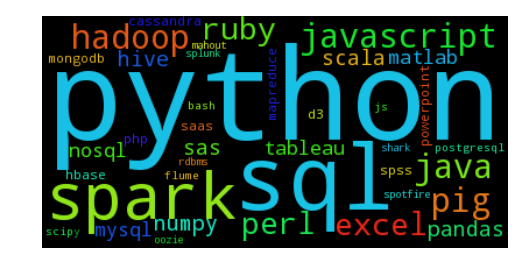

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
